In [4]:
from tensorflow.keras.layers import Input, SimpleRNN, GRU, LSTM, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam

import numpy as np
import matplotlib.pyplot as plt

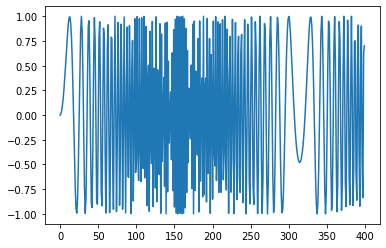

In [5]:
series = np.sin((0.1*np.arange(400))**2)
plt.plot(series)
plt.show()

In [6]:
T = 10
D = 1
X = []
Y = []
for t in range(len(series) - T):
    x = series[t:t+T]
    X.append(x)
    y = series[t+T]
    Y.append(y)

X = np.array(X).reshape(-1, T) # make it N x T
Y = np.array(Y)
N = len(X)
print("X.shape", X.shape, "Y.shape", Y.shape)

X.shape (390, 10) Y.shape (390,)


In [7]:
X = X.reshape(-1, T, 1) # make it N x T x D

# make the RNN
i = Input(shape=(T, D))
x = LSTM(10)(i)
x = Dense(1)(x)
model = Model(i, x)
model.compile(
  loss='mse',
  optimizer=Adam(lr=0.05),
)

# train the RNN
hist = model.fit(
  X[:-N//2], Y[:-N//2],
  batch_size=32,
  epochs=200,
  validation_data=(X[-N//2:], Y[-N//2:]),
)

Epoch 1/200
7/7 [==============================] - 0s 44ms/step - loss: 0.5155 - val_loss: 0.6273
Epoch 2/200
7/7 [==============================] - 0s 6ms/step - loss: 0.5189 - val_loss: 0.5604
Epoch 3/200
7/7 [==============================] - 0s 6ms/step - loss: 0.4749 - val_loss: 0.5109
Epoch 4/200
7/7 [==============================] - 0s 6ms/step - loss: 0.3957 - val_loss: 0.5527
Epoch 5/200
7/7 [==============================] - 0s 6ms/step - loss: 0.2960 - val_loss: 0.3851
Epoch 6/200
7/7 [==============================] - 0s 6ms/step - loss: 0.2290 - val_loss: 0.2976
Epoch 7/200
7/7 [==============================] - 0s 5ms/step - loss: 0.1615 - val_loss: 0.2509
Epoch 8/200
7/7 [==============================] - 0s 6ms/step - loss: 0.0968 - val_loss: 0.1370
Epoch 9/200
7/7 [==============================] - 0s 6ms/step - loss: 0.1089 - val_loss: 0.1806
Epoch 10/200
7/7 [==============================] - 0s 5ms/step - loss: 0.0772 - val_loss: 0.1522
Epoch 11/200
7/7 [==========

7/7 [==============================] - 0s 7ms/step - loss: 0.0047 - val_loss: 0.0361
Epoch 85/200
7/7 [==============================] - 0s 5ms/step - loss: 0.0047 - val_loss: 0.0250
Epoch 86/200
7/7 [==============================] - 0s 5ms/step - loss: 0.0027 - val_loss: 0.0372
Epoch 87/200
7/7 [==============================] - 0s 5ms/step - loss: 0.0020 - val_loss: 0.0357
Epoch 88/200
7/7 [==============================] - 0s 5ms/step - loss: 0.0024 - val_loss: 0.0322
Epoch 89/200
7/7 [==============================] - 0s 5ms/step - loss: 0.0017 - val_loss: 0.0380
Epoch 90/200
7/7 [==============================] - 0s 5ms/step - loss: 0.0017 - val_loss: 0.0266
Epoch 91/200
7/7 [==============================] - 0s 5ms/step - loss: 0.0012 - val_loss: 0.0340
Epoch 92/200
7/7 [==============================] - 0s 5ms/step - loss: 0.0011 - val_loss: 0.0250
Epoch 93/200
7/7 [==============================] - 0s 6ms/step - loss: 0.0020 - val_loss: 0.0381
Epoch 94/200
7/7 [===============

Epoch 167/200
7/7 [==============================] - 0s 5ms/step - loss: 0.0017 - val_loss: 0.0176
Epoch 168/200
7/7 [==============================] - 0s 5ms/step - loss: 0.0017 - val_loss: 0.0162
Epoch 169/200
7/7 [==============================] - 0s 6ms/step - loss: 0.0024 - val_loss: 0.0149
Epoch 170/200
7/7 [==============================] - 0s 5ms/step - loss: 0.0015 - val_loss: 0.0183
Epoch 171/200
7/7 [==============================] - 0s 5ms/step - loss: 0.0028 - val_loss: 0.0153
Epoch 172/200
7/7 [==============================] - 0s 5ms/step - loss: 0.0033 - val_loss: 0.0161
Epoch 173/200
7/7 [==============================] - 0s 5ms/step - loss: 0.0023 - val_loss: 0.0203
Epoch 174/200
7/7 [==============================] - 0s 5ms/step - loss: 0.0025 - val_loss: 0.0140
Epoch 175/200
7/7 [==============================] - 0s 5ms/step - loss: 0.0030 - val_loss: 0.0207
Epoch 176/200
7/7 [==============================] - 0s 5ms/step - loss: 0.0032 - val_loss: 0.0153
Epoch 177/

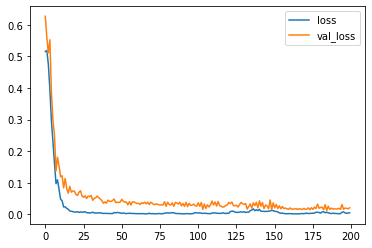

In [9]:
# plot some data
plt.plot(hist.history['loss'], label='loss')
plt.plot(hist.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

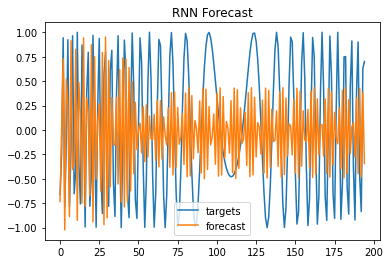

In [11]:
# Multi-step forecast
forecast = []
input_ = X[-N//2]
while len(forecast) < len(Y[-N//2:]):
    # Reshape the input_ to N x T x D
    f = model.predict(input_.reshape(1, T, 1))[0,0]
    forecast.append(f)

    # make a new input with the latest forecast
    input_ = np.roll(input_, -1)
    input_[-1] = f

plt.plot(Y[-N//2:], label='targets')
plt.plot(forecast, label='forecast')
plt.title("RNN Forecast")
plt.legend()
plt.show()